<a href="https://colab.research.google.com/github/Yunya0620/STA365/blob/main/Bayes3_GibbsPyMCandAutocorrelation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class Activity 3 [25 minutes]: normal-gamma toy model

Last we left out intrepid heros, we desired samples from  

|The Full (Joint) Posterior Distribuition||$\quad\quad\;\;$Full Conditional Distributions
|-|:-:|-|
|$$p(\theta,\phi|x) \color{gray}{= p(\theta,\phi|x,\theta_0,\tau,\alpha,\beta)}\quad\quad\quad$$|But had only derived |$$\scriptsize
\begin{align*}
p(\theta|x,\theta_0,\tau, \phi) &={} \text{N}\left(\frac{\left(\tau \theta_0+\phi\sum_{i=1}^{n}x_{i}\right)}{(\tau+n\phi)}, \sigma^{-2}=\tau+n\phi \right)\\
p(\phi|x, \alpha, \beta, \theta) &={} \text{Gamma}\left(\alpha+\frac{n}{2}, \beta+\frac{1}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 \right)
\end{align*}$$
|

**Alternatingly sample, back and fourth, between the two full conditionals, conditioning the sample draw for the current parameter on the last drawn value of the other parameter...**

| |
|:-|
|0. You'll need data... what's the data?
|1. You'll need ***actual parameters values*** to simulate data... what are $\theta_{true}$ and $\phi_{true}$?|
|2. You'll need to know your ***prior hyperparameters***... what are $\theta_0,\tau,\alpha,$ and $\beta$?|
|3. You'll need ***initial values*** from which to start the process... what are $\theta^{(0)}$ or $\phi^{(0)}$?|
|4. You'll need to sample from the ***full conditional distributions***... how to do that?|
|5. You'll need to visualize the $\theta^{(t)}$ and $\phi^{(t)}$ samples for $i = 1, \cdots T$... how to do that?|
|6. You'll need to summarise the $\theta^{(t)}$ and $\phi^{(t)}$ samples for $i = 1, \cdots T$... how to do that?|











# Class Activity 3: Solution [5 minutes]


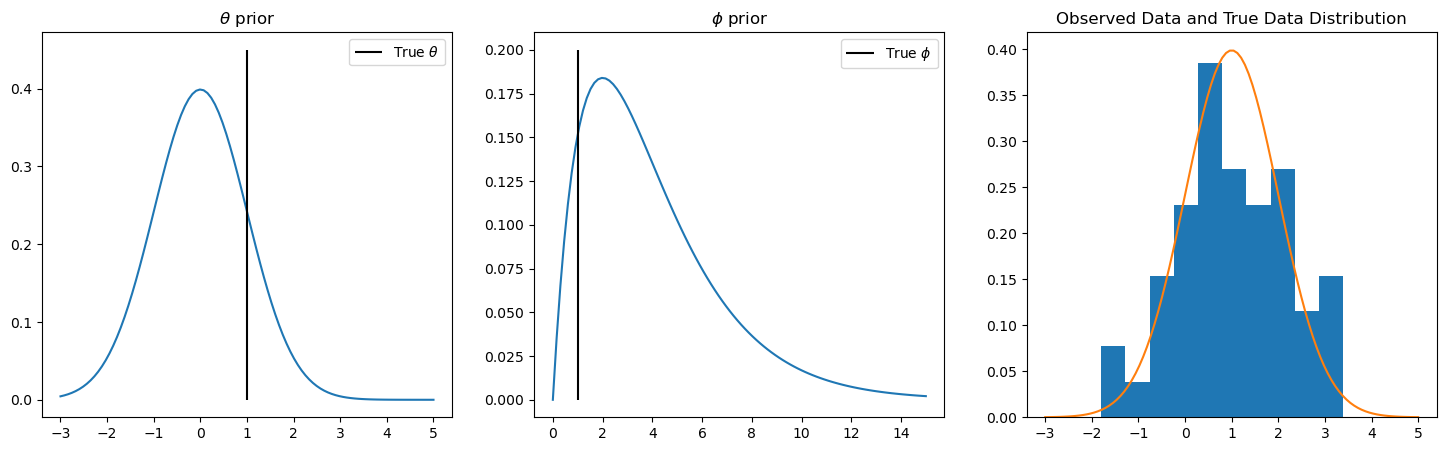

In [ ]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

theta_0,tau = 0,1; alpha,beta = 2,1/2 # Initialize Prior Hyperparameters: specify prior distributions
theta_prior = stats.norm(loc=theta_0, scale=tau) # https://en.wikipedia.org/wiki/Gamma_distribution
phi_prior = stats.gamma(a=alpha, scale=1/beta)   # Note: scale is 1/ beta (beta is rate parameter)

# In real world we probably wouldn't know for sure what distribution our data x is from:
# We wouldn't know the theta_true / phi_true, or even if the likelihood was normally distributed...
# and don't forget about the priors/hyperparameters above... these also require considerations...
theta_true,phi_true = 1,1; true_data_model = stats.norm(loc=theta_true,scale=phi_true)
n = 50; np.random.seed(seed=123); x = true_data_model.rvs(n);

Rplus = np.linspace(0,15,100); Rpm = np.linspace(-3,5,100)
fig,ax = plt.subplots(1,3,figsize=(18,5)); ax[0].plot(Rpm, theta_prior.pdf(Rpm)); ax[0].set_title('$\\theta$ prior'); ax[0].vlines(theta_true,0,.45,'k',label='True $\\theta$'); ax[0].legend(); ax[1].plot(Rplus, phi_prior.pdf(Rplus)); ax[1].vlines(phi_true,0,.2,'k',label='True $\\phi$'); ax[1].legend(); ax[1].set_title('$\\phi$ prior'); ax[2].hist(x, density=True); ax[2].plot(Rpm, true_data_model.pdf(Rpm)); ax[2].set_title('Observed Data and True Data Distribution');

# Class Activity 3: Solution [5 minutes]


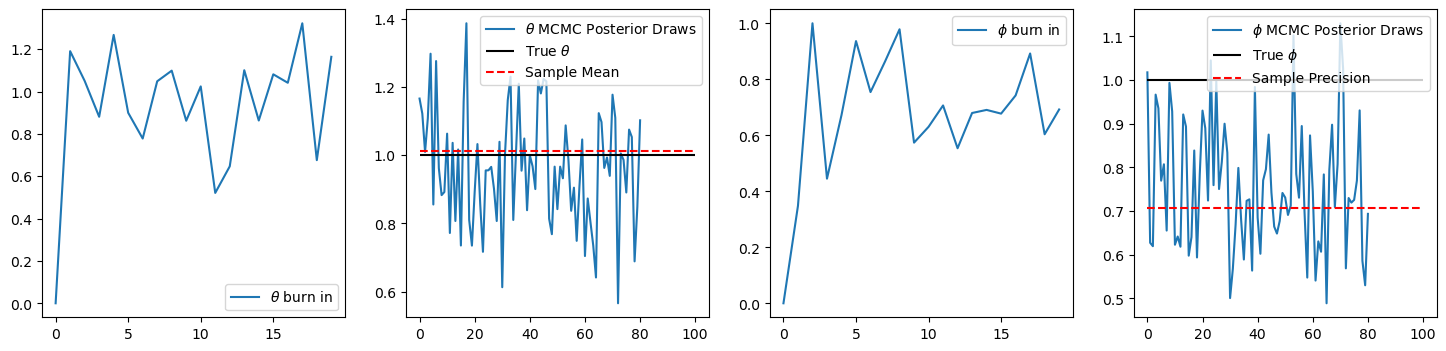

In [ ]:
# Solution from Leo Watson
iterations = 100 # Gibbs Samples
theta_gibbs_posterior_mcmc_draws,phi_gibbs_posterior_mcmc_draws = np.zeros(iterations+1),np.zeros(iterations+1)
# initial_theta,initial_phi = 0,0 # Not really an initial phi as we'll do the phi first per update
# Ideally we want our initial values near the "typical set" which along with similar density values
# comprise the large majority of the probability of the distribution so the convergence is faster
np.random.seed(123)
for i in range(1, iterations + 1):
    theta_old = theta_gibbs_posterior_mcmc_draws[i-1]

    phi_new = stats.gamma(a = alpha+n/2, scale = (1/(beta+1/2*((x-theta_old)**2).sum()))).rvs()
    phi_gibbs_posterior_mcmc_draws[i] = phi_new

    theta_new = stats.norm(loc= (tau*theta_0+phi_new*sum(x))/(tau+n*phi_new),
                           scale= 1/np.sqrt(tau+n*phi_new)).rvs()
    theta_gibbs_posterior_mcmc_draws[i] = theta_new

burn = 20
fig,ax = plt.subplots(1,4, figsize=(18,4)); ax[0].plot(theta_gibbs_posterior_mcmc_draws[:burn],label="$\\theta$ burn in"); ax[1].plot(theta_gibbs_posterior_mcmc_draws[burn:],label="$\\theta$ MCMC Posterior Draws"); ax[2].plot(phi_gibbs_posterior_mcmc_draws[:burn], label="$\\phi$ burn in"); ax[3].plot(phi_gibbs_posterior_mcmc_draws[burn:], label="$\\phi$ MCMC Posterior Draws"); ax[1].hlines(theta_true,0,iterations,'k',label='True $\\theta$'); ax[3].hlines(phi_true,0,iterations,'k',label='True $\\phi$'); ax[1].hlines(x.mean(),0,iterations,'r',linestyle='dashed',label='Sample Mean'); ax[1].legend(); ax[3].hlines(1/x.var(),0,iterations,'r',linestyle='dashed',label='Sample Precision'); ax[3].legend(); ax[0].legend(); ax[2].legend();

# Class Activity 3: Solution [3 minutes]


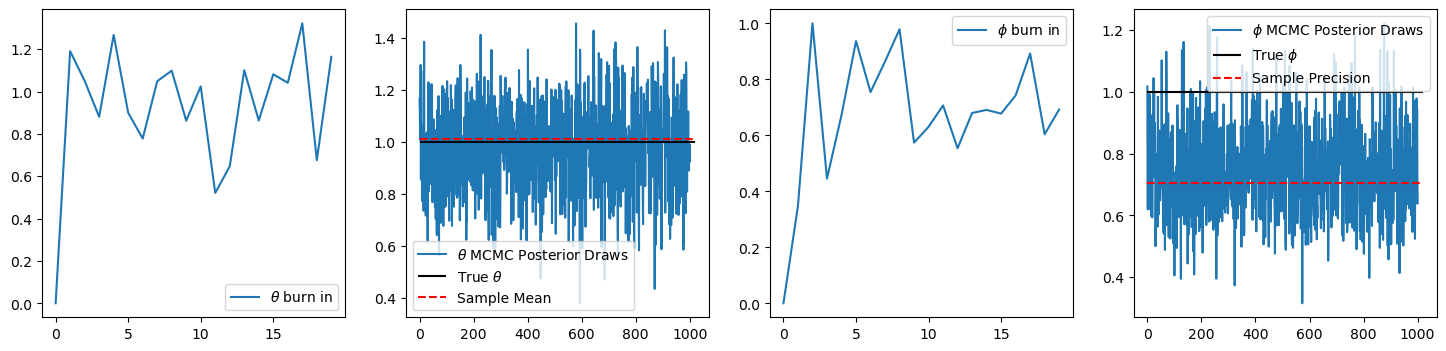

In [ ]:
# Solution from Leo Watson # DEPENDENCE GETS WASHED OUT AND PROBABLY STOPS MATTERING IN THE LONG RUN
iterations = 1020 # Gibbs Samples
theta_gibbs_posterior_mcmc_draws,phi_gibbs_posterior_mcmc_draws = np.zeros(iterations+1),np.zeros(iterations+1)
# initial_theta,initial_phi = 0,0 # Not really an initial phi as we'll do the phi first per update
# Ideally we want our initial values near the "typical set" which along with similar density values
# comprise the large majority of the probability of the distribution so the convergence is faster
np.random.seed(123)
for i in range(1, iterations + 1):
    theta_old = theta_gibbs_posterior_mcmc_draws[i-1]

    phi_new = stats.gamma(a = alpha+n/2, scale = (1/(beta+1/2*sum((x-theta_old)**2)))).rvs()
    phi_gibbs_posterior_mcmc_draws[i] = phi_new

    theta_new = stats.norm(loc= (tau*theta_0+phi_new*sum(x))/(tau+n*phi_new),
                           scale= 1/np.sqrt(tau+n*phi_new)).rvs()
    theta_gibbs_posterior_mcmc_draws[i] = theta_new

burn = 20
fig,ax = plt.subplots(1,4, figsize=(18,4)); ax[0].plot(theta_gibbs_posterior_mcmc_draws[:burn],label="$\\theta$ burn in"); ax[1].plot(theta_gibbs_posterior_mcmc_draws[burn:],label="$\\theta$ MCMC Posterior Draws"); ax[2].plot(phi_gibbs_posterior_mcmc_draws[:burn], label="$\\phi$ burn in"); ax[3].plot(phi_gibbs_posterior_mcmc_draws[burn:], label="$\\phi$ MCMC Posterior Draws"); ax[1].hlines(theta_true,0,iterations,'k',label='True $\\theta$'); ax[3].hlines(phi_true,0,iterations,'k',label='True $\\phi$'); ax[1].hlines(x.mean(),0,iterations,'r',linestyle='dashed',label='Sample Mean'); ax[1].legend(); ax[3].hlines(1/x.var(),0,iterations,'r',linestyle='dashed',label='Sample Precision'); ax[3].legend(); ax[0].legend(); ax[2].legend();

# Class Activity 3: Solution [4 minutes]


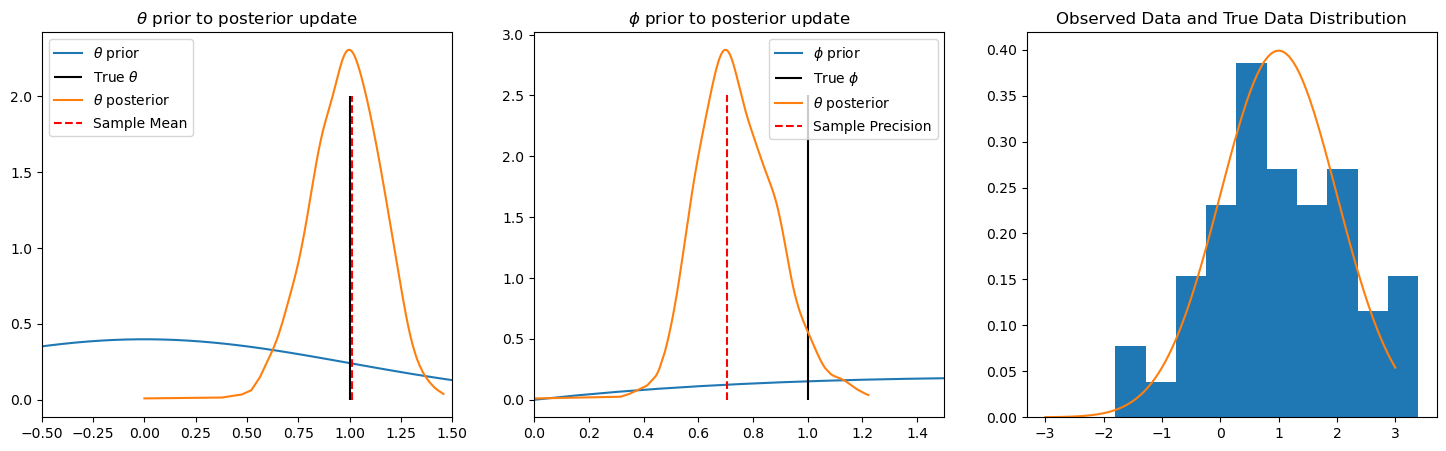

In [ ]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
theta_0,tau = 0,1; alpha,beta = 2,1/2 # Initialize Prior Hyperparameters: specify prior distributions
theta_prior = stats.norm(loc=theta_0, scale=tau) # https://en.wikipedia.org/wiki/Gamma_distribution
phi_prior = stats.gamma(a=alpha, scale=1/beta)   # Note: scale is 1/ beta (beta is rate parameter)
# In real world we probably wouldn't know for sure what distribution our data x is from:
# We wouldn't know the theta_true / phi_true, or even if the likelihood was normally distributed...
# and don't forget about the priors/hyperparameters above... these also require considerations...
theta_true,phi_true = 1,1; true_data_model = stats.norm(loc=theta_true,scale=phi_true)
n = 50; np.random.seed(seed=123); x = true_data_model.rvs(n);
Rplus = np.linspace(0,15,100); Rpm = np.linspace(-3,3,100)
fig,ax = plt.subplots(1,3,figsize=(18,5)); ax[0].plot(Rpm, theta_prior.pdf(Rpm), label='$\\theta$ prior'); ax[0].set_title('$\\theta$ prior to posterior update'); ax[0].vlines(theta_true,0,2,'k',label='True $\\theta$'); ax[1].plot(Rplus, phi_prior.pdf(Rplus), label='$\\phi$ prior'); ax[1].vlines(phi_true,0,2.5,'k',label='True $\\phi$'); ax[1].set_title('$\\phi$ prior to posterior update'); ax[2].hist(x, density=True); ax[2].plot(Rpm, true_data_model.pdf(Rpm)); ax[2].set_title('Observed Data and True Data Distribution');
from scipy.stats import gaussian_kde
theta_gibbs_posterior_mcmc_draws_sorted = sorted(theta_gibbs_posterior_mcmc_draws);
ax[0].plot(theta_gibbs_posterior_mcmc_draws_sorted,gaussian_kde(theta_gibbs_posterior_mcmc_draws_sorted)(theta_gibbs_posterior_mcmc_draws_sorted), label='$\\theta$ posterior'); ax[0].vlines(x.mean(),0,2,'r',linestyle='dashed',label='Sample Mean');
phi_gibbs_posterior_mcmc_draws_sorted = sorted(phi_gibbs_posterior_mcmc_draws);
ax[1].plot(phi_gibbs_posterior_mcmc_draws_sorted,gaussian_kde(phi_gibbs_posterior_mcmc_draws_sorted)(phi_gibbs_posterior_mcmc_draws_sorted), label='$\\theta$ posterior'); ax[1].vlines(1/x.var(),0,2.5,'r',linestyle='dashed',label='Sample Precision'); ax[0].legend(); ax[1].legend(); ax[0].set_xlim([-.5,1.5]); ax[1].set_xlim([0,1.5]);

# Gibbs Sampling: History [8 minutes]

- There is a [log-linear model](https://en.wikipedia.org/wiki/Log-linear_model) known as the
[Boltzmann distribution](https://en.wikipedia.org/wiki/Boltzmann_distribution)...
   > The ***Boltzmann distribution*** is also called the ***Gibbs distribution*** after the statistical physicist whose research frequently utilized and explored it
- In 1984 the ***Geman brothers*** figured out an algorithm to <u>sample from the Boltzmann distribution</u> that had analogy to a statistical physics processes analyzed by Gibbs, *so they named their* ***sampler*** after ***Gibbs***...
    
- In 1990 [my first advisor from 2005-2007] Alan Gelfand introduced a generalized ***Gibbs sampling*** algorithm to the statistical community as a powerful tool for generalized ***Bayesian posterior analysis***...

> ***Gibbs sampling*** initially dominated Bayesian posterior analysis; but, the cyclical "one dimension at a time" nature of ***Gibbs sampling*** suffers from a prohibitive "curse of dimensionality" limiting its application to low dimentional parameter spaces. ***Hamiltonian Monte Carlo*** (***HMC***) generally avoids this for ***continuous*** distributions, so ***Gibbs sampling*** is now only used in ***discrete contexts*** (often in conjuction with ***Metropolis-Hastings***) where ***HMC*** can't be used.



# Gibbs Sampling: Algorithm [10 minutes]

**The Gibbs Sampler is a simple algorithm...<br>cyclically sampling through *Full Conditional Distributions*<br> produces samples from the corresponding *Full (Joint) Posterior Distribution***<br>just as you've done above for the class activity...

<table><tr><th></th><th></th></tr><tr><td>

***Gibbs sampling***: cycle through ***full conditionals***
    
\begin{align*}
1. &\;{} p(\theta_1^{(t)}|\theta_q^{(t-1)},\cdots,\theta_2^{(t-1)},x)\\
2. &\;{} p(\theta_2^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_3^{(t-1)}, \theta_1^{(t)}, x)\\
3. &\;{} p(\theta_3^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_4^{(t-1)}, \theta_2^{(t)}, \theta_1^{(t)}, x)\\
4. &\;{} p(\theta_4^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_5^{(t-1)}, \theta_3^{(t)}, \theta_2^{(t)},\theta_1^{(t)}, x)\\
\vdots\;& {} \\
q. &\;{} p(\theta_q^{(t)}|\theta_{q-1}^{(t)}, \cdots, \theta_1^{(t)}, x)\\
&\;{} \text{completes one full cycle; return to 1...}    
\end{align*}


</td>
<td>

This is NOT the chain rule... $$\require{cancel}\cancel{p(\theta_1^{(t)}|x)p(\theta_2^{(t)}| \theta_1^{(t)}, x)\cdots p(\theta_q^{(t)}|\theta_{q-1}^{(t)},\cdots, \theta_2^{(t)}, \theta_1^{(t)}, x)}$$

This is a ***Markov process*** for (vector) $\theta$ since $\theta^{(t)}$ depends only on $\theta^{(t-1)}$.

The ***Gibbs sampling*** ***Markov process*** will converge to a<br>***stationary distribution*** which will be the ***posterior distribution*** $p(\theta |  x)$

The samples from ***Gibbs sampling*** are a ***Markov Chain***<br>of sequentially (***Markov***) dependent samples forming a ***Markov process***<br>whose ***stationary distribution*** will be the ***posterior distribution*** $p(\theta |  x)$

</td>
</tr>
    
</table>





# Markov Chain Monte Carlo (MCMC): Idea [4 minutes]

**Bayesain posterior analysis** is based on **Markov Chain Monte Carlo**
- ***Markov Chain***: sequentially dependent samples (from a stationary/posterior distribution)
- ***Monte Carlo (Integration)***: since **expectation** $\equiv$ **integration** so **integration** $\equiv$ **estimation**

This is because Bayesian posterior inference takes two forms:

1. $\quad\displaystyle \color{gray}{\bar x = \frac{1}{T}\sum_{t=1}^N x_i \approx E[X] = \int x f(x) dx}$

    - <font style='color:white'>Estimation is an "average" of possible parameter values "weighted" by their uncertainty which is encoded in our posterior belief about the parameters...</font> <font style='color:white'>"fairly" takes into account all possibilities</font>
    - <font style='color:white'>Whereas "best choice" MLE or $\displaystyle \theta^{\text{MAP}} = \max_\theta p(\theta|x)$ is sensitive to sample overfitting...</font><br><font style='color:white'>it's just the best for the sample at hand but doesn't take into account uncertainty...</font>
    
   


# Markov Chain Monte Carlo (MCMC): Idea [6 minutes]

**Bayesain posterior analysis** is based on **Markov Chain Monte Carlo**
- ***Markov Chain***: sequentially dependent samples (from a stationary/posterior distribution)
- ***Monte Carlo (Integration)***: since **expectation** $\equiv$ **integration** so **integration** $\equiv$ **estimation**

This is because Bayesian posterior inference takes two forms:

1. $\quad\displaystyle E[\theta|x] = \int \theta p(\theta|x) d\theta \quad \text{ is estimated with } \quad \bar \theta = \frac{1}{T}\sum_{t=1}^T \theta^{(t)} \quad \text{ for } \quad \theta^{(t)} \sim p(\theta|x)$

    - Estimation is an "average" of possible parameter values "weighted" by their uncertainty which is encoded in our posterior belief about the parameters... <font style='color:gray'>"fairly" takes into account all possibilities</font>
    - Whereas "best choice" MLE or $\displaystyle \theta^{\text{MAP}} = \max_\theta p(\theta|x)$ is sensitive to sample overfitting...<br><font style='color:gray'>MLE or $\displaystyle \theta^{\text{MAP}}$ just the best for the sample at hand but doesn't take into account uncertainty...</font>
    
   


# Markov Chain Monte Carlo (MCMC): Idea [2 minutes]

**Bayesain posterior analysis** is based on **Markov Chain Monte Carlo**
- ***Markov Chain***: sequentially dependent samples (from a stationary/posterior distribution)
- ***Monte Carlo (Integration)***: since **expectation** $\equiv$ **integration** so **integration** $\equiv$ **estimation**

This is because Bayesian posterior inference takes two forms:

2. $\quad\displaystyle \Pr(\theta \leq a) = \int^a_{-\infty}  p(\theta|x) d\theta \quad \text{ is estimated with } \quad \hat p_{\theta\leq a} = \frac{1}{T}\sum_{t=1}^T 1_{[\infty,a]}(\theta^{(t)}) \quad \text{ for } \; \theta^{(t)} \sim p(\theta|x)$

    - <font style='color:white'>Estimation is an "average" of possible parameter values "weighted" by their uncertainty which is encoded in our posterior belief about the parameters...</font> <font style='color:white'>"fairly" takes into account all possibilities</font>
    - <font style='color:white'>Whereas "best choice" MLE or $\displaystyle \theta^{\text{MAP}} = \max_\theta p(\theta|x)$ is sensitive to sample overfitting...</font><br><font style='color:white'>it's just the best for the sample at hand but doesn't take into account uncertainty...</font>



# Markov Chain Monte Carlo (MCMC): Idea [6 minutes]

**Bayesain posterior analysis** is based on **Markov Chain Monte Carlo**
- ***Markov Chain***: sequentially dependent samples (from a stationary/posterior distribution)
- ***Monte Carlo (Integration)***: since **expectation** $\equiv$ **integration** so **integration** $\equiv$ **estimation**

This is because Bayesian posterior inference takes two forms:

2. $\quad\displaystyle \underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} \approx \int_a^b  p(\theta|x) d\theta \quad \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor T\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil T\times(1-\frac{\alpha}{2})\right\rceil\right)}}  \quad \text{ and } \; \theta^{(t)} \sim p(\theta|x)$

    - Interval estimation is the range of possible parameter values we believe might be plausible based on our posterior uncertainty beliefs... <font style='color:blue'>given as the probability statement $\Pr_{\theta|x}(a\leq \theta \leq b) = 1-\alpha$</font>
    - This is a $100\times(1-\alpha)\%$ ***Bayesian credible interval*** conveying posterior belief about parameter $\theta$<br><font style='color:gray'>Bayesian posterior inference remains based upon ***integration*** rather than ***maximization***</font>



# Markov Chain Monte Carlo (MCMC): Idea [2 minutes]

**Bayesain posterior analysis** is based on **Markov Chain Monte Carlo**
- ***Markov Chain***: sequentially dependent samples (from a stationary/posterior distribution)
- ***Monte Carlo (Integration)***: since **expectation** $\equiv$ **integration** so **integration** $\equiv$ **estimation**

This is because Bayesian posterior inference takes two forms:

1. Estimating the ***posterior mean*** (expected value integration problem)<br>via ***Markov Chain Monte Carlo Integration***

2. Solving the interval bounds of a (probability calculation) integration problem<br>giving a "plausible paramter range" probability statements via ***Markov Chain Monte Carlo Integration***

***Gibbs sampling*** <font style="color:Gray;">is not a ***chain rule*** decomposition of ***full (joint) posterior distributions*** $p(\theta|x)$ but nonetheless</font><br>
creates (sequentially [***Markov***] dependent) ***Markov chain*** samples from ***full (joint) posterior distribution*** $p(\theta|x)$.<br><font style="color:blue;">While  sequentially dependent, they are still samples from $p(\theta|x)$ providing posterior MCMC integration inference </font>




# MCMC Bayesian Inference: Credible Intervals [10 minutes]


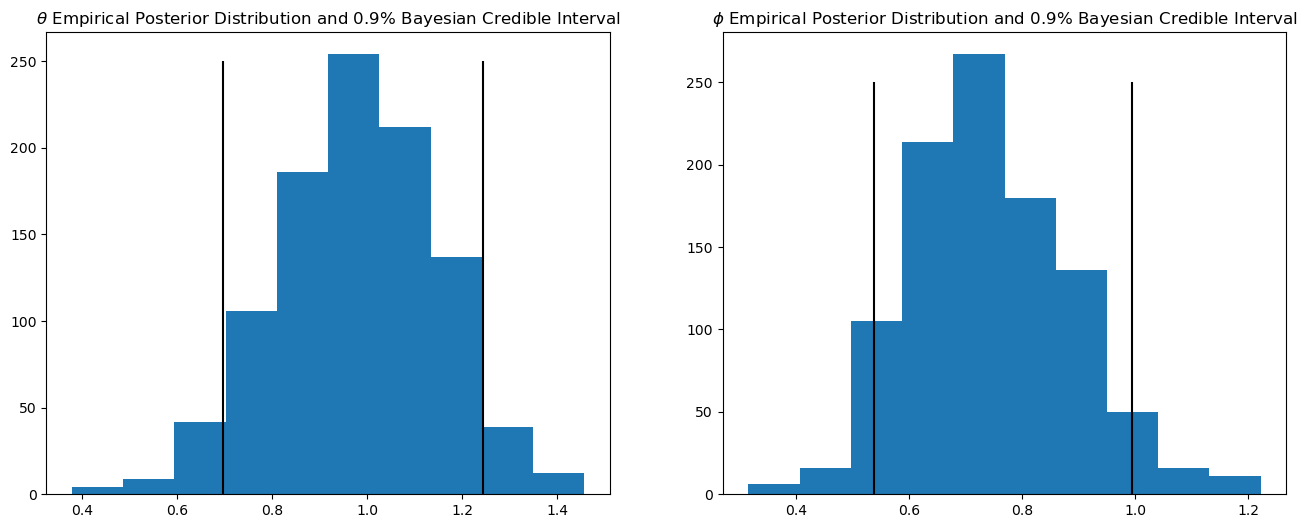

In [ ]:
# MCMC estimate posterior means / re-emphsize credible intervals from initial problem
burn_in = 20; BayesianCredibleInterval_probability = 0.90
left_probability = (1-BayesianCredibleInterval_probability)/2
right_probability = left_probability + BayesianCredibleInterval_probability
fig,ax = plt.subplots(1,2,figsize=(16,6))
param=['$\\theta$','$\\phi$']
for i,posterior_samples in enumerate([theta_gibbs_posterior_mcmc_draws, phi_gibbs_posterior_mcmc_draws]):
    BayesianCredibleInterval = np.quantile(posterior_samples[burn_in:],[left_probability, right_probability])
    ax[i].hist(posterior_samples[20:]); ax[i].set_title(param[i]+" Empirical Posterior Distribution and "+str(BayesianCredibleInterval_probability)+"% Bayesian Credible Interval")
    ax[i].vlines(BayesianCredibleInterval,ymin=0,ymax=250,color ='k')

# `PyMC`: Probabilistic Programming [10 minutes]

- ***Hamiltonian Monte Carlo*** (***HMC***) and ***Metropolis-Hastings*** (***M-H***)<br>were mentioned when introducing ***Gibbs sampling***...
- Without yet knowing what these are, we can use them with `PyMC`

In [ ]:
theta_0,tau = 0,1; alpha,beta = 2,1/2 # Initialize Prior Hyperparameters: specify prior distributions

import pymc as pm#; from scipy import stats; x = stats.norm().rvs(10)
normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model:
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=x)

which specifies...

\begin{align*}
p(\theta,\phi|x) &\propto{} p(\theta,\phi,x) = \overset{N(\theta, \phi)}{p(x|\theta)}\overset{N(\theta_0, \tau)}{p(\theta)}\overset{\text{Gamma}(\alpha,\beta)}{p(\phi)\quad\quad}  (\theta \perp\!\!\perp \phi) \leftarrow \text{priors} \\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \phi^{\alpha -1}e^{-\beta \phi}\\
\end{align*}

# `PyMC`: Posterior Sampling  [5 minutes]

- ***Hamiltonian Monte Carlo*** (***HMC***) and ***Metropolis-Hastings*** (***M-H***) with `PyMC`
    - ***Gibbs sampling*** is not even an option for ***continuous variables*** in `PyMC`...

In [ ]:
with normal_gamma_toy_model:
    idata_HMC = pm.sample() # default is the NUTS implementation of HMC

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, phi]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


In [ ]:
with normal_gamma_toy_model:
    MH = pm.Metropolis([theta, phi], S=np.array([0.1]), tune=False, tune_interval=0)
    idata_MH = pm.sample(step=MH) # force MH

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [theta]
>Metropolis: [phi]


Sampling 4 chains for 0 tune and 2_000 draw iterations (0 + 8_000 draws total) took 0 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


# `PyMC`: Traceplot "Convergence" Checks  [10 minutes]

|Do MCMC chains with different initial values seem to agree?|[***Warm-up periods*** are discared]|
|-|-|
|$M$ split chains of $N$ samples created from $M/2$ chains halved in the middle with and $\text{Split-}\hat R$ statists are [calculated](https://arxiv.org/abs/1903.08008): values of $1$ mean indistinguishable chains while values of $>1.05$ fail the similarity test<br><br>$\text{Split-}\hat R$ is just an ANOVA style comparision of<br>"within chains" variability versus "between chains" variability |$$ \text{Split-}\hat R = \sqrt{\frac{\frac{N-1}{N}W +  \overbrace{\frac{1}{M-1}\sum_{m=1}^M (\overline{\theta^{(m,\cdot)}} - \overline{\theta^{(\cdot,\cdot)}})^2}^{\text{between chain variance}} }{\underbrace{\frac{1}{M}\sum_{m=1}^M \frac{1}{N-1}\sum_{n=1}^N (\theta^{(m,n)} - \overline{\theta^{(m,\cdot)}})^2}_{\text{$W$: within chain variance}}} } $$|

HMC Split-Rhats {'theta': 1.0026, 'phi': 1.0007} | MH Split-Rhats {'theta': 1.0129, 'phi': 1.0277}


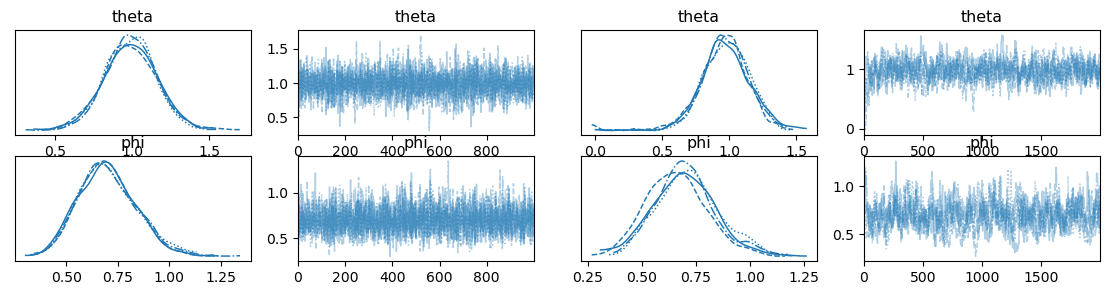

In [ ]:
import arviz as az; import matplotlib.pyplot as plt; fig,ax = plt.subplots(2,4, figsize=(14,3))
az.plot_trace(idata_HMC, axes=ax[:2,:2]); az.plot_trace(idata_MH, axes=ax[:2,2:])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()}, end=' | '); print('MH Split-Rhats',{k: np.round(v.values,4) for k,v in az.rhat(idata_MH).items()})

# MCMC: A Closer Look [10 minutes]


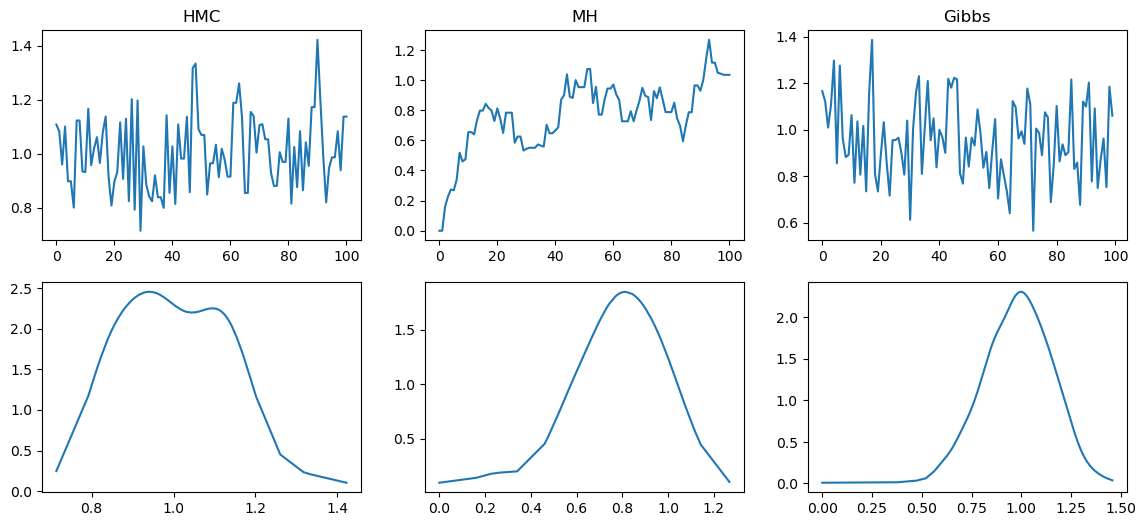

In [ ]:
from scipy.stats import gaussian_kde; import matplotlib.pyplot as plt; fig,ax = plt.subplots(2,3, figsize=(14,6))
n_mcmc_samples = 100
mcmc_chain = idata_HMC.posterior["theta"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values; mcmc_chain_sorted = sorted(mcmc_chain)
ax[0,0].plot(mcmc_chain); ax[1,0].plot(mcmc_chain_sorted,gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted)); ax[0,0].set_title("HMC");
mcmc_chain = idata_MH.posterior["theta"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values; mcmc_chain_sorted = sorted(mcmc_chain)
ax[0,1].plot(mcmc_chain); ax[1,1].plot(mcmc_chain_sorted,gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted)); ax[0,1].set_title("MH");
ax[0,2].plot(theta_gibbs_posterior_mcmc_draws[burn:(burn+n_mcmc_samples)]); ax[0,2].set_title("Gibbs");
theta_gibbs_posterior_mcmc_draws_sorted = sorted(theta_gibbs_posterior_mcmc_draws);
ax[1,2].plot(theta_gibbs_posterior_mcmc_draws_sorted,gaussian_kde(theta_gibbs_posterior_mcmc_draws_sorted)(theta_gibbs_posterior_mcmc_draws_sorted));

# MCMC: Autocorrelation (10 minutes)

Autocorrelation for HMC (MCMC) chain -0.0140628109479451               ...is negative autocorrelation good?
Autocorrelation for MH (MCMC) chain 0.9084368880554985                 ...is large positive autocorrelation good?
Autocorrelation for Gibbs Sampling (MCMC) chain 0.021150850107231244   ...is no autocorrelation the best?


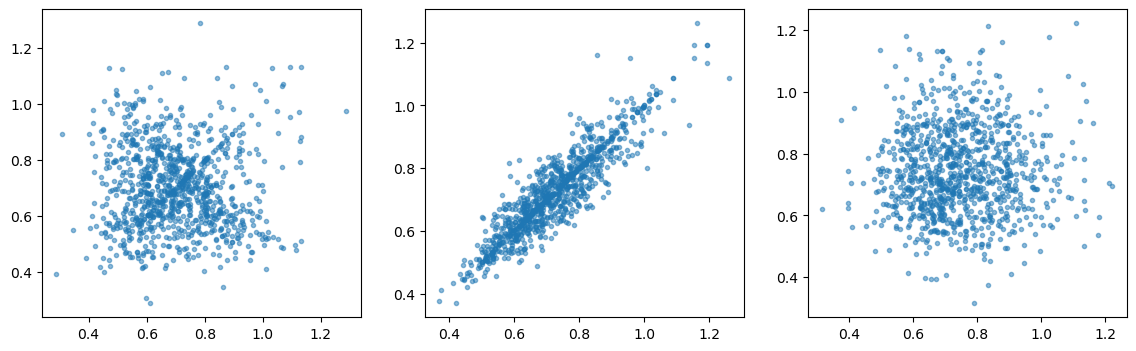

In [ ]:
import numpy as np; import matplotlib.pyplot as plt; fig,ax = plt.subplots(1,3, figsize=(14,4))
max_mcmc_samples = 1000
mcmc_chain = idata_HMC.posterior["phi"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values; mcmc_chain_one_step_ahead = idata_HMC.posterior["phi"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values; ax[0].plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5)
print("Autocorrelation for HMC (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1], "              ...is negative autocorrelation good?")
mcmc_chain = idata_MH.posterior["phi"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values; mcmc_chain_one_step_ahead = idata_MH.posterior["phi"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values; ax[1].plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5);
print("Autocorrelation for MH (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1], "                ...is large positive autocorrelation good?")
ax[2].plot(phi_gibbs_posterior_mcmc_draws[burn:-1],phi_gibbs_posterior_mcmc_draws[(burn+1):], '.', alpha=0.5);
print("Autocorrelation for Gibbs Sampling (MCMC) chain", np.corrcoef(phi_gibbs_posterior_mcmc_draws[burn:-1],phi_gibbs_posterior_mcmc_draws[(burn+1):])[0,1], "  ...is no autocorrelation the best?")

# MCMC: [Effective Sample Size](https://mc-stan.org/posterior/reference/ess_tail.html) [10 minutes]

`PyMC` labels $n_{\text{eff}} = \frac{n}{\sum_{t=-\infty}^\infty\rho_t} = \frac{n}{1+2\sum_{t=1}^\infty\rho_t}$ for order $t$ autocorrelations $\rho_t$ in the MCMC chains

<sup>`ess_bulk` while `ess_tail` is the same but after converting to binary sequences estimating 5% tail quantiles.</sup>

In [ ]:
import arviz as az; print("number of MCMC samples:", idata_HMC.posterior['phi'].values.flatten().shape[-1])
az.summary(idata_HMC, round_to=2) # https://python.arviz.org/en/stable/api/generated/arviz.ess.html

number of MCMC samples: 4000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.98,0.17,0.66,1.31,0.0,0.0,3880.51,2568.12,1.0
phi,0.70,0.14,0.45,0.96,0.0,0.0,3959.53,2736.66,1.0


In [ ]:
print("number of MCMC samples:", idata_MH.posterior['phi'].values.flatten().shape[-1])
az.summary(idata_MH, round_to=2)

number of MCMC samples: 8000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.97,0.18,0.65,1.30,0.01,0.01,390.50,561.12,1.01
phi,0.69,0.14,0.42,0.97,0.01,0.01,188.56,317.92,1.03


# MCMC Bayesian Inference: Credible Intervals [5 minutes]

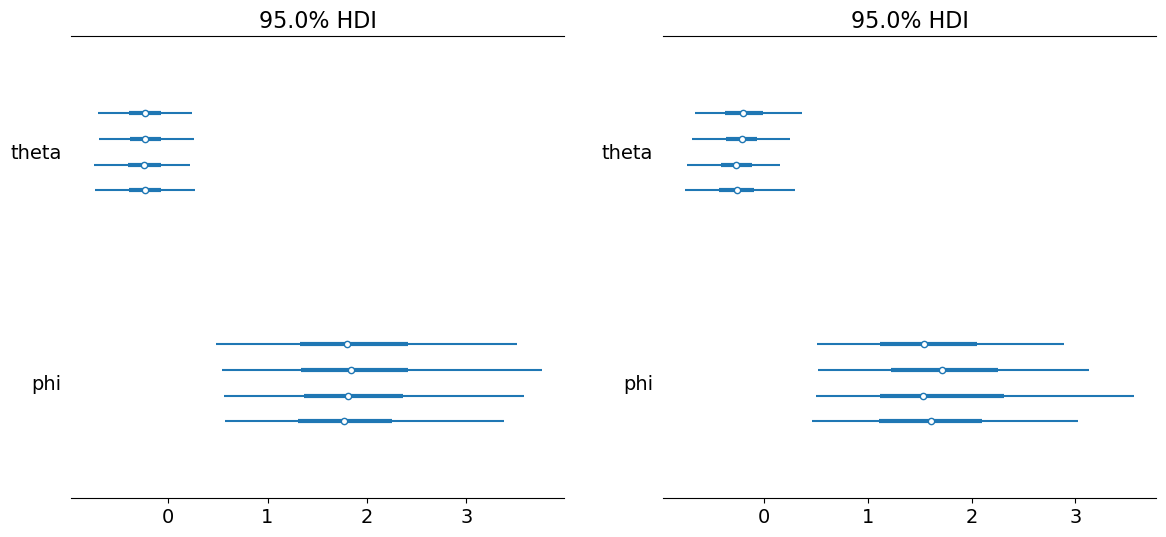

In [ ]:
import arviz as az; import matplotlib.pyplot as plt; fig,ax = plt.subplots(1,2, figsize=(14,6))
az.plot_forest(idata_HMC, var_names=["theta","phi"], combined=False, hdi_prob=0.95, ax=ax[0]);
az.plot_forest(idata_MH, var_names=["theta","phi"], combined=False, hdi_prob=0.95, ax=ax[1]);

# Homework #3 -- *you'll need to do this on google colab*

0. Find data set on [kaggle](https://www.kaggle.com).
1. Provide posterior inference for a column of data with a `PyMC` ***normal-gamma specification***.
2. Find a different column of data for which a ***normal-gamma specification*** isn't justified.
3. Create a different `PyMC` specification that IS appropriate for this new data column:
    - here are your `PyMC` choices for [continuous distributions](https://www.pymc.io/projects/docs/en/stable/api/distributions/continuous.html)
    - here are your `PyMC` choices for [discrete distributions](https://www.pymc.io/projects/docs/en/stable/api/distributions/discrete.html)

### ...just make sure you've chosen a reasonable likelihood for your non-normal data and that the support of your priors makes sense for the values the parameters of your likelihood can take on...

4. Provide posterior inference for the parameters of your new specification given the column of non-normal data
using `PyMC` and provide an analysis of the MCMC chains.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving training_set_label.csv to training_set_label.csv


In [5]:
import pandas as pd
filename = next(iter(uploaded))
data = pd.read_csv(filename)
print(data.head())
print(data.columns)

   Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name founded_at  ...  \
0      San Diego                     NaN        Bandsintown   01-01-07  ...   
1      Los Gatos                     NaN          TriCipher   01-01-00  ...   
2      San Diego      San Diego CA 92121              Plixi  3/18/2009  ...   
3      Cupertino      Cupertino CA 95014  Solidcore Systems   01-01-02  ...   
4  San Francisco  San Francisco CA 94105     Inhale Digital   08-01-10  ...   

  object_id has_VC has_angel  has_roundA  has_roundB  has_roundC  has_roundD  \
0    c:6669      0         1  

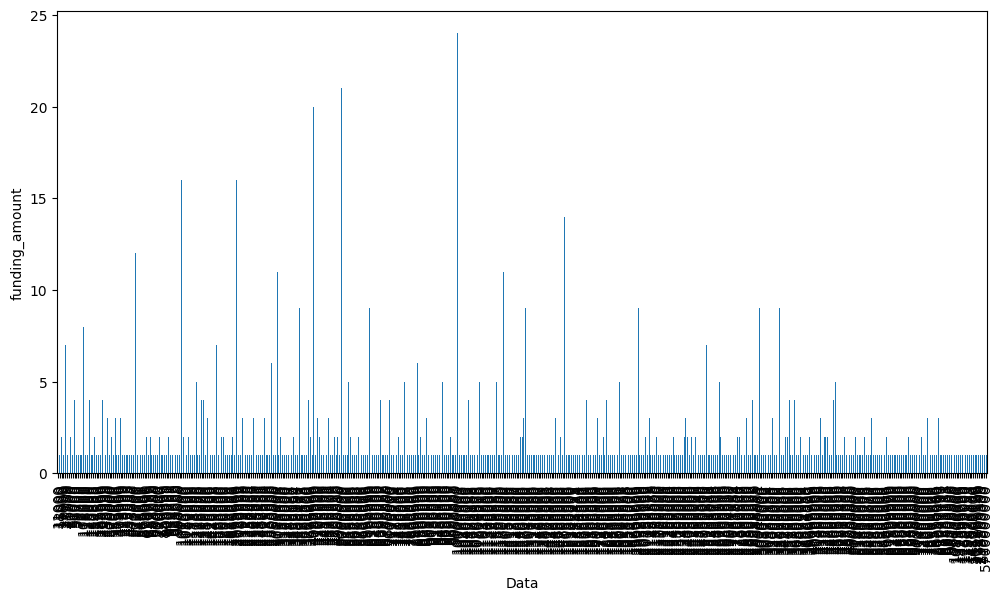

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
funding_counts = data['funding_total_usd'].value_counts()

funding_counts = funding_counts.sort_index()
funding_counts.plot(kind='bar')
plt.ylabel('funding_amount')
plt.xlabel('Data');


In [21]:
import pymc as pm
import arviz as az
normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model:
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=data['funding_total_usd'])
with normal_gamma_toy_model:
    idata = pm.sample()

print("number of MCMC samples:", idata.posterior['phi'].values.flatten().shape[-1])
az.summary(idata, round_to=2)
az.plot_forest(idata, var_names=["theta","phi"], combined=False, hdi_prob=0.95);

number of MCMC samples: 2000


TypeError: plot_trace() got an unexpected keyword argument 'hdi_prob'

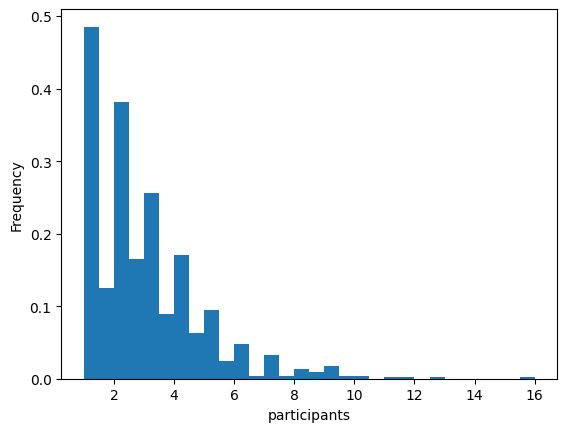

In [8]:
plt.hist(data['avg_participants'], density=True, bins=30)
plt.ylabel('Frequency')
plt.xlabel('participants')

plt.show()


Average_participant column cannot be justify by a normal-gamma specification since it's not normally distributed

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.853,0.021,0.813,0.890,0.0,0.0,3901.0,2889.0,1.0
sigma,0.618,0.015,0.593,0.647,0.0,0.0,4612.0,3208.0,1.0


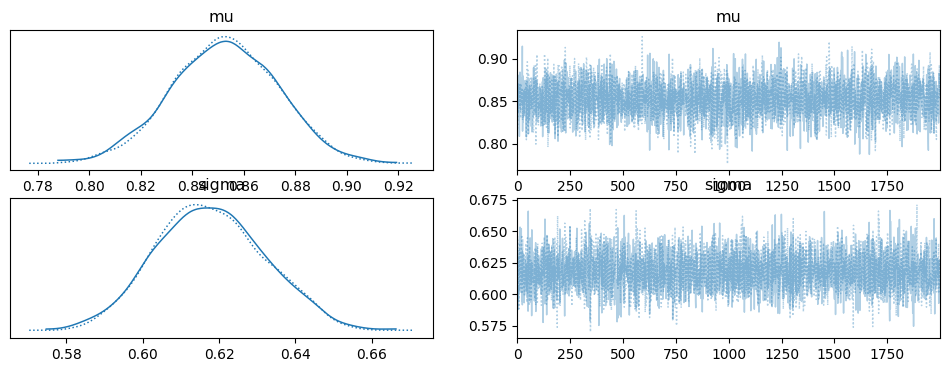

In [27]:
# Since the data is positive and right-skewed, a log-normal distribution might be a better fit
with pm.Model() as model:
    mu = pm.Normal('mu', mu=np.log(data['avg_participants']).mean(), sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Lognormal likelihood
    participants_likelihood = pm.Lognormal('avg_participants', mu=mu, sigma=sigma, observed=data['avg_participants'])

    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Posterior analysis
az.plot_trace(trace)
az.summary(trace)